# Predicting House Prices in Ames

### Problem Statement

This project aims to identify what the most important features are in the pricing of a house. This information can be helpful for sellers who wish to increase the value of their home before selling and buyers whom would want to better understand the price of a home before buying.

In this project, Machine Learning models will be created to predict the house prices. The Ames Housing dataset provided by Kaggle will be used. The train.csv is used to train our model and the test.csv is for fitting the model to make predictions.
This model will later be uploaded to Kaggle to receive a score on how well my RMSE compares to other competitors.

### Table of Contents

* #### 1. Introduction
* #### 2. Data Organization
    * ##### 2.1 Imports
    * ##### 2.2 Loading Data
    * ##### 2.3 Initial Observations
* #### 3. Exploratory Data Analysis
    * ##### 3.1 Features exploration
    * ##### 3.2 Collinearity
    * ##### 3.3 Outliers
    * ##### 3.4 Missing Values
* #### 4. Data Cleaning
    * ##### 4.1 Removing Outliers
    * ##### 4.2 Missing Values
    * ##### 4.3 Removing Collinear features
    * ##### 4.4 New columns
* #### 5. Modelling/ Evaluation
* #### 6. Submission

### 1. Introduction

For further information on the competition, please refer here: https://www.kaggle.com/competitions/dsi-us-11-project-2-regression-challenge/data


To hear from Dean De Cock, the author of the Ames Housing Data, please refer to: http://jse.amstat.org/v19n3/decock.pdf

### 2. Data Organization

#### 2.1 Import Libraries

In [1]:
    # Data Analysis
    
import numpy as np
import pandas as pd


    # Data Visualization
    
import seaborn as sns
import matplotlib.pyplot as plt


    # Machine Learning
    
import sklearn.linear_model as linear_model    
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing  import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics


    # Styling
    
sns.set_style('darkgrid') 
plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option('display.max_columns', 999)

#### 2.2 Loading Data

In [2]:
    # Importing Train dataset
    
train1 = pd.read_csv('datasets/train.csv')


    # Importing Test dataset
    
test = pd.read_csv('datasets/test.csv')

In [3]:
    # Separating independent variables from the dependent variable.
    
X_train = train1.drop(['SalePrice'], axis=1)
y = train1.SalePrice

  # Checking if columns for test and train (without SalePrice) match
    
list(X_train.columns) == list(test.columns)

True

In [4]:
# Concatenating train and test data
train = pd.concat([train1, test], axis=0)

#### 2.3 Initial Observations

In [6]:
print(train.shape)
print(X_train.shape)
print(test.shape)

(2929, 81)
(2051, 80)
(878, 80)


In [7]:
train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500.0
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000.0
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000.0
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000.0
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 0 to 877
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2929 non-null   int64  
 1   PID              2929 non-null   int64  
 2   MS SubClass      2929 non-null   int64  
 3   MS Zoning        2929 non-null   object 
 4   Lot Frontage     2439 non-null   float64
 5   Lot Area         2929 non-null   int64  
 6   Street           2929 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2929 non-null   object 
 9   Land Contour     2929 non-null   object 
 10  Utilities        2929 non-null   object 
 11  Lot Config       2929 non-null   object 
 12  Land Slope       2929 non-null   object 
 13  Neighborhood     2929 non-null   object 
 14  Condition 1      2929 non-null   object 
 15  Condition 2      2929 non-null   object 
 16  Bldg Type        2929 non-null   object 
 17  House Style    

In [9]:
test.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1958,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,869,869,GasA,TA,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,840,0,1680,0,0,2,1,2,1,Gd,3,Typ,0,NaN,Attchd,2004.0,RFn,2,588,TA,TA,Y,0,111,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,N

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [11]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice       float64
Length: 81, dtype: object

In [12]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [13]:
    # Most Missing Values
    
train.isnull().mean().sort_values(ascending=False).head(27)

Pool QC           0.995562
Misc Feature      0.963810
Alley             0.932400
Fence             0.804712
Fireplace Qu      0.485490
SalePrice         0.299761
Lot Frontage      0.167293
Garage Finish     0.054285
Garage Qual       0.054285
Garage Cond       0.054285
Garage Yr Blt     0.054285
Garage Type       0.053602
Bsmt Exposure     0.028337
BsmtFin Type 2    0.027654
Bsmt Cond         0.027313
Bsmt Qual         0.027313
BsmtFin Type 1    0.027313
Mas Vnr Area      0.007853
Mas Vnr Type      0.007853
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
Garage Cars       0.000341
Garage Area       0.000341
Total Bsmt SF     0.000341
BsmtFin SF 2      0.000341
Electrical        0.000341
BsmtFin SF 1      0.000341
dtype: float64

###  3. Exploratory Data Analysis

#### 3.1 Features exploration

In [14]:
    # Numerical features
    
num_train = train.select_dtypes([int, float])
num_train.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [15]:
    # Categorical Features
    
cat_train = train.select_dtypes([object])
cat_train.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [16]:
# Most important features impacting SalePrice
corr = train.corr()
corr.sort_values(["SalePrice"], ascending= False, inplace = True)
corr.SalePrice

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

<AxesSubplot:>

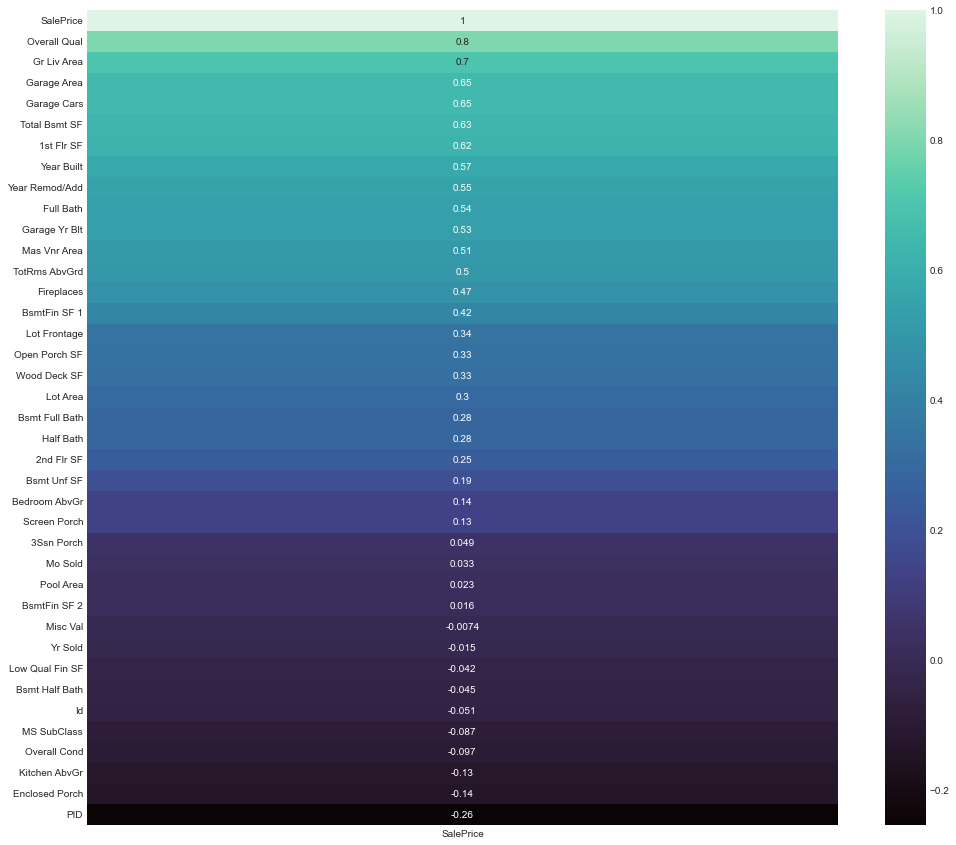

In [17]:
# Heatmap for Numerical Features 
plt.figure(figsize = (15, 15))
sns.heatmap(num_train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), annot = True, cmap = 'mako')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

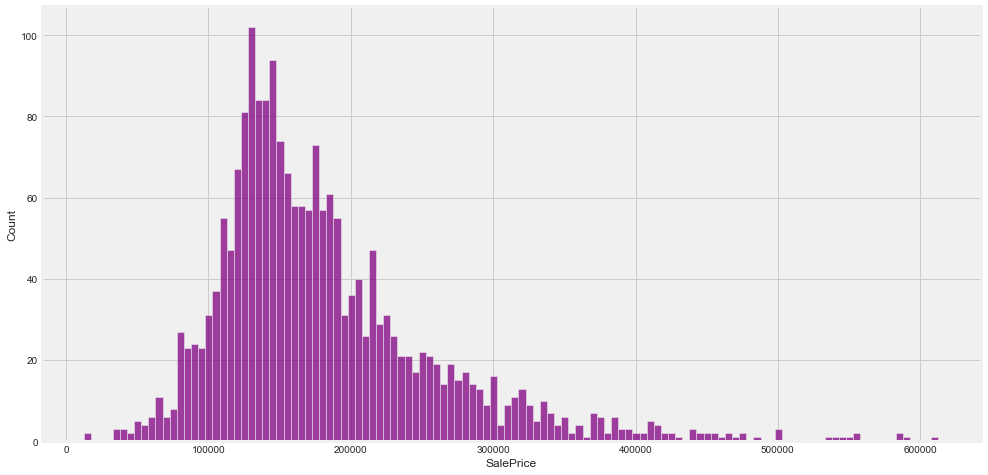

In [18]:
    # Sale prices of houses
    
plt.figure(figsize=(15, 8))
sns.histplot(y, color = 'purple', binwidth= 5000)

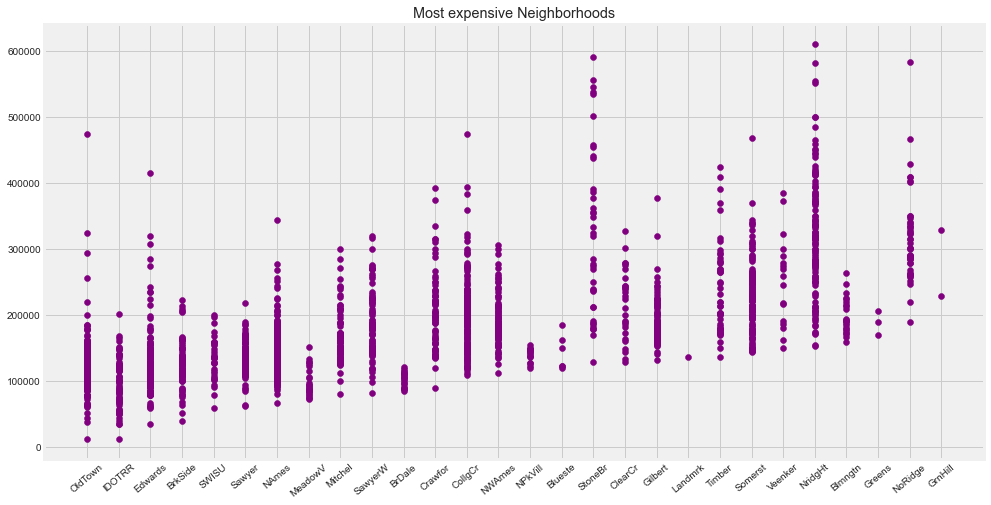

In [19]:
SalePriceO = train.sort_values('SalePrice', ascending= True)

#SalePrice by Neighbhorhood
    #Sizing
plt.figure(figsize = (15, 8))

 #Title
plt.title("Most expensive Neighborhoods")

# Rotation
plt.xticks(rotation = 40)

    #Graph
plt.scatter(SalePriceO['Neighborhood'], SalePriceO['SalePrice'], color = 'purple')


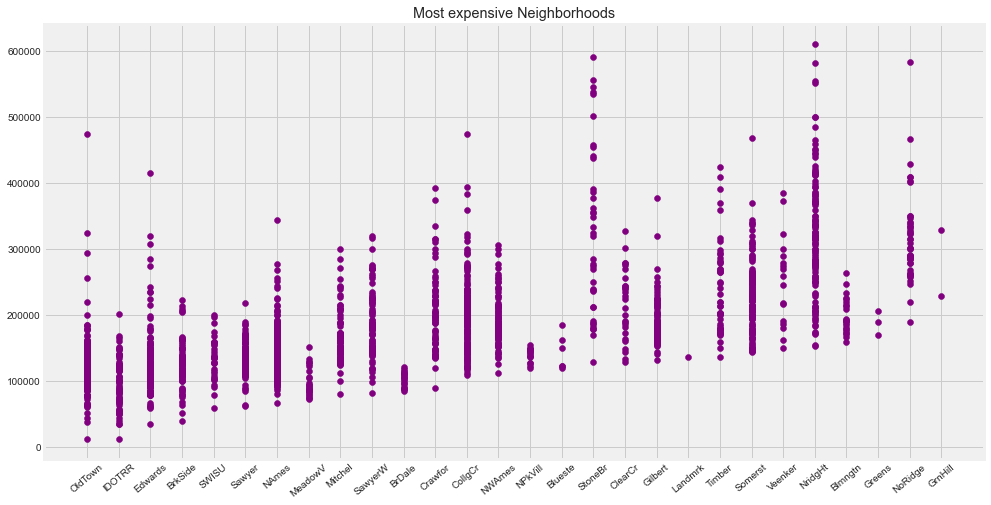

In [20]:
SalePriceO = train.sort_values('SalePrice', ascending= True)

#SalePrice by Neighbhorhood
    #Sizing
plt.figure(figsize = (15, 8))

 #Title
plt.title("Most expensive Neighborhoods")

# Rotation
plt.xticks(rotation = 40)

    #Graph
plt.scatter(SalePriceO['Neighborhood'], SalePriceO['SalePrice'], color = 'purple')


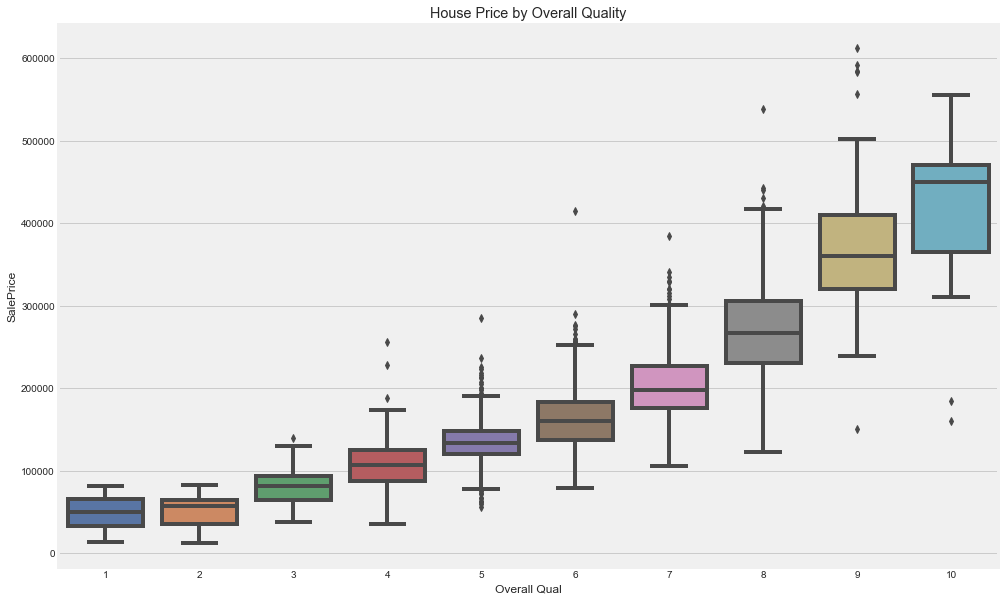

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Overall Qual', y='SalePrice', data=train, palette='deep')
title = plt.title('House Price by Overall Quality')

<BarContainer object of 2929 artists>

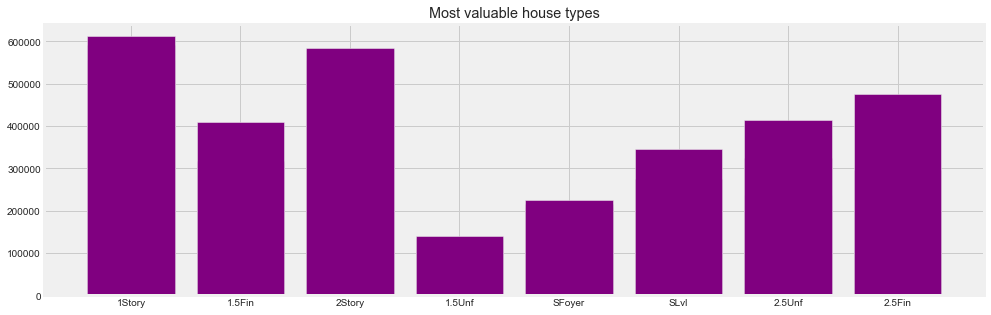

In [22]:
  #Sizing
plt.figure(figsize = (15, 5))

 #Title
plt.title("Most valuable house types")

    #Graph
plt.bar(SalePriceO['House Style'], SalePriceO['SalePrice'], color = 'purple')

#### 3.2 Collinearity 

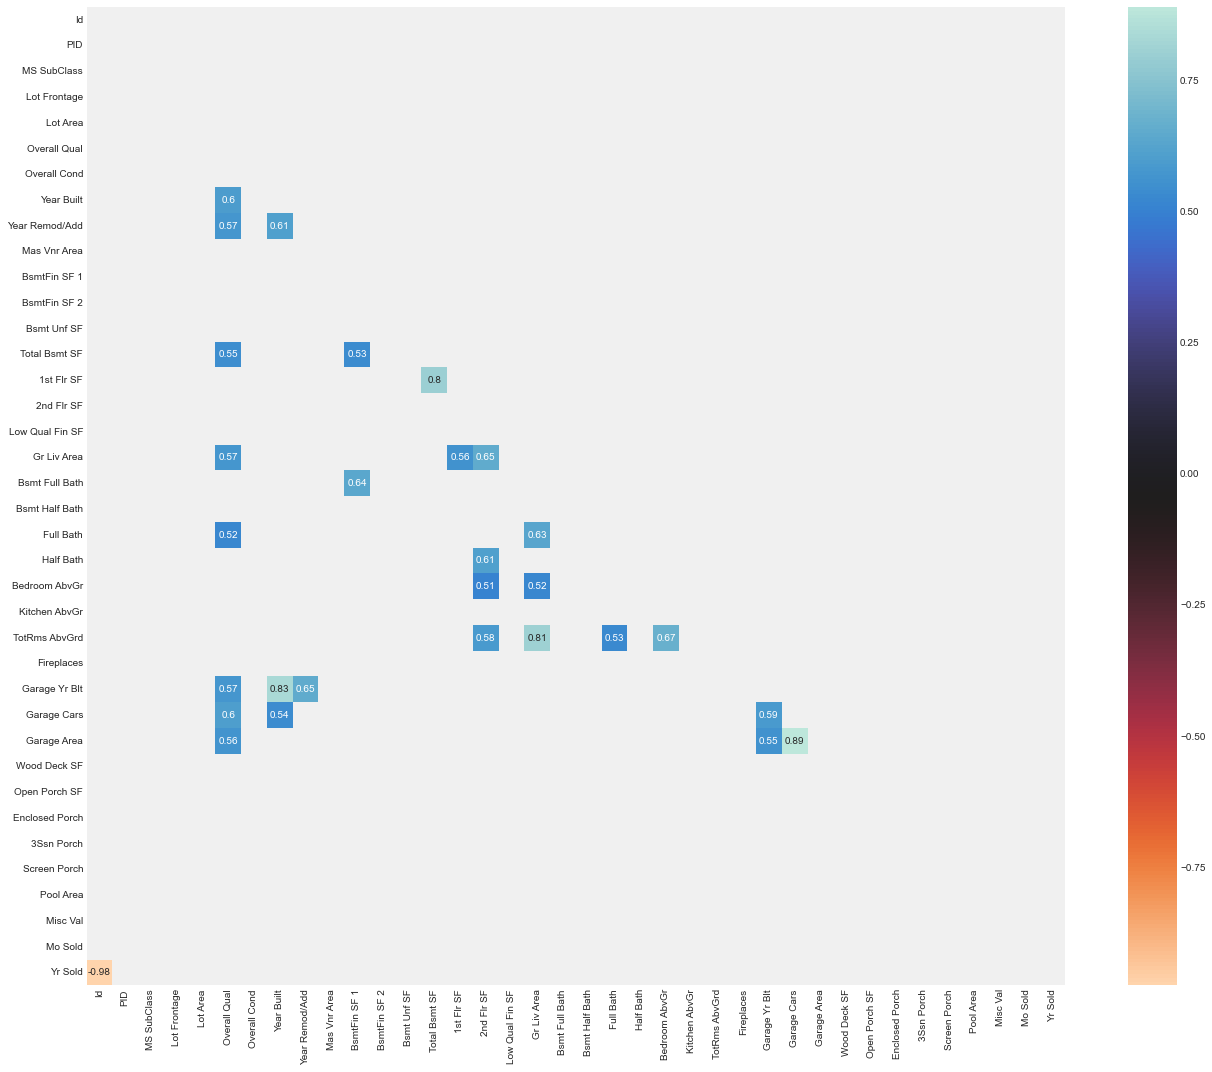

In [23]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize = (20, 18))

corr_1= train.iloc[:, :-1].corr()

# Select correlations greater than 0.5

corr_collinear= corr_1[abs(corr_1) >= 0.5]


corr = train.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_collinear)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr_collinear, mask = mask, annot=True, cmap = 'icefire_r', square = True);

* GarageCars and GarageArea = 0.89
* Garage Built and Yrbuilt = 0.83// Drop Garage Built
* 1stFlrSF and TotalBsmtSF = 0.81
* GrLivArea and TotRmsAbvGrd = 0.81


#### 3.3 Outliers

C:\Users\shaik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


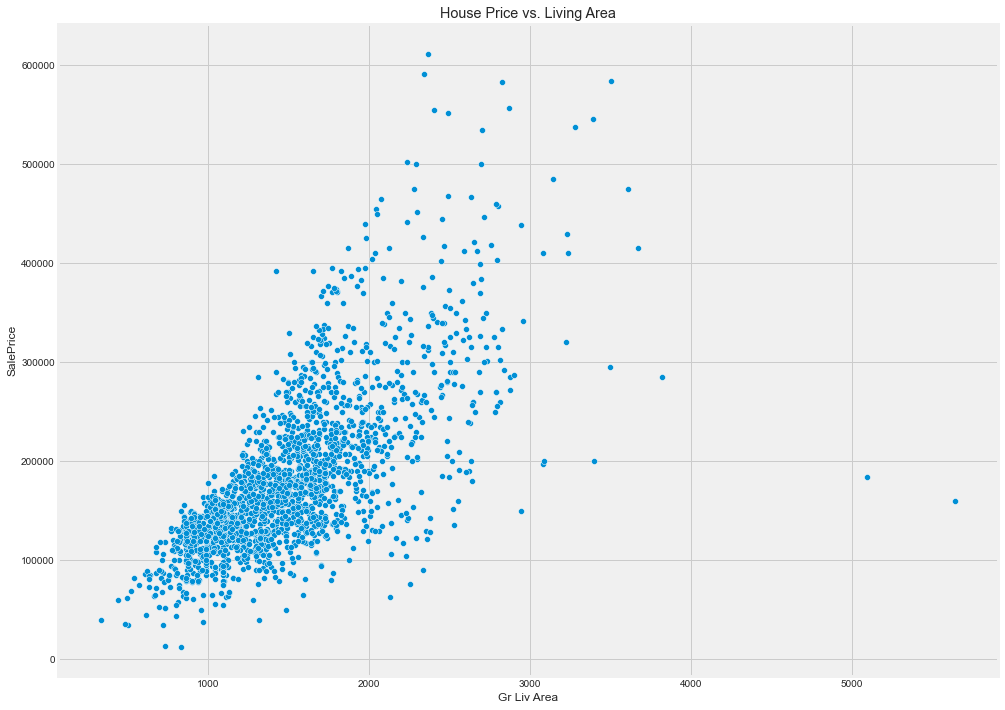

In [24]:
plt.figure(figsize=(15, 12))

sns.scatterplot(train['Gr Liv Area'], train['SalePrice'])
                                            
title = plt.title('House Price vs. Living Area')

#### 3.4 Missing Values

In [25]:
train.isnull().mean().sort_values(ascending=False).head(27)

Pool QC           0.995562
Misc Feature      0.963810
Alley             0.932400
Fence             0.804712
Fireplace Qu      0.485490
SalePrice         0.299761
Lot Frontage      0.167293
Garage Finish     0.054285
Garage Qual       0.054285
Garage Cond       0.054285
Garage Yr Blt     0.054285
Garage Type       0.053602
Bsmt Exposure     0.028337
BsmtFin Type 2    0.027654
Bsmt Cond         0.027313
Bsmt Qual         0.027313
BsmtFin Type 1    0.027313
Mas Vnr Area      0.007853
Mas Vnr Type      0.007853
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
Garage Cars       0.000341
Garage Area       0.000341
Total Bsmt SF     0.000341
BsmtFin SF 2      0.000341
Electrical        0.000341
BsmtFin SF 1      0.000341
dtype: float64

### 4. Data Cleaning

##### 4.1 Removing outliers

The [author](http://jse.amstat.org/v19n3/decock.pdf) suggests removing any outliers which can be identified with an Area over 4000.

In [26]:
outliers = train[(train['Gr Liv Area'] > 4000)
                           & (train.SalePrice < 200000)].index
train.drop(outliers, axis=0, inplace=True)

#### 4.2 Missing Values

In [27]:
  # Alley: These are houses which do not have alleys
    
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")

In [28]:
    # Basement features: It can be assumed there is no basement
    
train.loc[:, "Bsmt Exposure"] = train.loc[:, "Bsmt Exposure"].fillna("None")
train.loc[:, "BsmtFin Type 1"] = train.loc[:, "BsmtFin Type 1"].fillna("None")
train.loc[:, "BsmtFin Type 2"] = train.loc[:, "BsmtFin Type 2"].fillna("None")
train.loc[:, "Bsmt Cond"] = train.loc[:, "Bsmt Cond"].fillna("None")
train.loc[:, "Bsmt Qual"] = train.loc[:, "Bsmt Qual"].fillna("None")
train.loc[:, "Bsmt Half Bath"] = train.loc[:, "Bsmt Half Bath"].fillna(0)
train.loc[:, "Bsmt Full Bath"] = train.loc[:, "Bsmt Full Bath"].fillna(0)
train.loc[:, "Total Bsmt SF"] = train.loc[:, "Bsmt Unf SF"].fillna(0)
train.loc[:, "Bsmt Unf SF"] = train.loc[:, "Bsmt Unf SF"].fillna(0)
train.loc[:, "BsmtFin SF 1"] = train.loc[:, "BsmtFin SF 1"].fillna("None")
train.loc[:, "BsmtFin SF 2"] = train.loc[:, "BsmtFin SF 2"].fillna("None")

In [29]:
    # Garage Features: There is no garage for these houses

train.loc[:, "Garage Type"] = train.loc[:, "Garage Type"].fillna("None")
train.loc[:, "Garage Finish"] = train.loc[:, "Garage Finish"].fillna("None")
train.loc[:, "Garage Qual"] = train.loc[:, "Garage Qual"].fillna("None")
train.loc[:, "Garage Cond"] = train.loc[:, "Garage Cond"].fillna("None")
train.loc[:, "Garage Cars"] = train.loc[:, "Garage Cars"].fillna(0)

In [30]:
    # Fence: There is no fence for these houses
    
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("None")

In [31]:
train.loc[:, "Fireplace Qu"] = train.loc[:, "Fireplace Qu"].fillna("None")

In [32]:
    # lot Frontage: These houses likely do not have a lot frontage
    
train.loc[:, "Lot Frontage"] = train.loc[:, "Lot Frontage"].fillna(0)

In [33]:
     # Veneers: These houses likely do not have veneers
    
train.loc[:, "Mas Vnr Type"] = train.loc[:, "Mas Vnr Type"].fillna("None")
train.loc[:, "Mas Vnr Area"] = train.loc[:, "Mas Vnr Area"].fillna(0)

In [34]:
    # MiscFeature: There is no Miscanelleous Feature
    
train.loc[:, "Misc Feature"] = train.loc[:, "Misc Feature"].fillna("None")

In [35]:
    # Pool QC: These houses likely do not have a pool
    
train.loc[:, "Pool QC"] = train.loc[:, "Pool QC"].fillna("No")

##### 4.3 Removing Collinear Features

In [36]:
# We already have Year house was built
    
train.drop('Garage Yr Blt', axis=1, inplace= True)

In [37]:
# Garage Cars will be kept and Garage Area removed
train.drop('Garage Area', axis=1, inplace= True)

In [38]:
train.drop('TotRms AbvGrd', axis=1, inplace= True)

In [39]:
train.drop('1st Flr SF', axis=1, inplace= True)

In [40]:
    #Checking for remaining missing values
    
sum(train.isnull().sum())

879

##### 4.4 New Column

In [41]:
train["AllSF"] = train['Gr Liv Area'] + train['Total Bsmt SF']

In [42]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice          1.000000
Overall Qual       0.803462
Gr Liv Area        0.719463
Garage Cars        0.648227
AllSF              0.592580
Year Built         0.572405
Year Remod/Add     0.550872
Full Bath          0.538225
Mas Vnr Area       0.511273
Fireplaces         0.473783
Open Porch SF      0.338545
Wood Deck SF       0.327629
Lot Area           0.303744
Bsmt Full Bath     0.284433
Half Bath          0.283372
2nd Flr SF         0.248826
Total Bsmt SF      0.190883
Bsmt Unf SF        0.190883
Lot Frontage       0.185351
Bedroom AbvGr      0.137145
Screen Porch       0.134555
3Ssn Porch         0.048721
Mo Sold            0.032508
Pool Area          0.025805
Misc Val          -0.010323
Yr Sold           -0.015174
Low Qual Fin SF   -0.041608
Bsmt Half Bath    -0.045534
Id                -0.051416
MS SubClass       -0.087331
Overall Cond      -0.097093
Kitchen AbvGr     -0.125472
Enclosed Porch    -0.135713
PID               -0.255068
Name: SalePrice, dtype: float64


In [43]:
    #Creating dummies
train = pd.get_dummies(cat_train)
train

,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,G

### 5. Modelling

In [44]:
print(train.shape)
print(X_train.shape)
print(test.shape)

(2929, 262)
(2051, 80)
(878, 80)


In [45]:
X_train = train.iloc[:2051, :]
X_train.shape

(2051, 262)

In [46]:
testDf = train.iloc[2051:, :]
print(testDf.shape)
testDf.reset_index(drop=True, inplace=True)

(878, 262)


In [47]:
trainDf = pd.merge(X_train, y, how='inner', left_index=True, right_index=True)

In [48]:
print(trainDf.shape)
print(X_train.shape)
print(testDf.shape)
print(y.shape)

(2051, 263)
(2051, 262)
(878, 262)
(2051,)


In [49]:
features_model = [x for x in train.columns if x != 'SalePrice']

In [50]:
X_train.isnull().sum()

MS Zoning_A (agr)    0
MS Zoning_C (all)    0
MS Zoning_FV         0
MS Zoning_I (all)    0
MS Zoning_RH         0
                    ..
Sale Type_ConLw      0
Sale Type_New        0
Sale Type_Oth        0
Sale Type_VWD        0
Sale Type_WD         0
Length: 262, dtype: int64

In [51]:
X = trainDf[features_model]
y = trainDf['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [52]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)
Xtr_score = lr.score(X_train_sc, y_train)
print("X_train score is:", Xtr_score)
Xtr_pred = lr.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xtest_score = lr.score(X_test_sc, y_test)
print("X_test score is:", Xtest_score)
Xtest_pred = lr.predict(X_test_sc)
Xtest_rmse = np.sqrt(metrics.mean_squared_error(y_test, Xtest_pred))

X_sc = ss.transform(X)
train_score = lr.score(X_sc, y)
X_pred = lr.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_test RMSE is:", Xtest_rmse)

if Xtest_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_test")
else:
    print("RMSE score worsened (is higher) for X_test")

print("Overall RMSE is:", X_rmse)

X_train score is: 0.873631851952724
X_test score is: -1.6710735013923558e+23
Overall train score is: -4.087292636853522e+22

X_train RMSE is: 28270.442308902515
X_test RMSE is: 3.2031910065926948e+16
RMSE score worsened (is higher) for X_test
Overall RMSE is: 1.6019858983059962e+16


In [53]:
lr = LinearRegression()

print(cross_val_score(lr, X_train, y_train, cv=3))
print(cross_val_score(lr, X_train, y_train, cv=3).mean())

[-1.76134981e+20 -4.13886450e+22 -5.51978551e+22]
-3.225421166625973e+22


In [54]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train_sc, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

548.7139731730442


.......................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [58]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_sc, y_train)

Xtr_score = lasso.score(X_train_sc, y_train)
print("Using Lasso...")
print("X_train score is:", Xtr_score)
Xtr_pred = lasso.predict(X_train_sc)
Xtr_rmse = np.sqrt(metrics.mean_squared_error(y_train, Xtr_pred))

Xtest_score = lasso.score(X_test_sc, y_test)
print("X_test score is:", Xtest_score)
Xtest_pred = lasso.predict(X_test_sc)
Xtest_rmse = np.sqrt(metrics.mean_squared_error(y_test, Xtest_pred))


X_sc = ss.transform(X)
train_score = lasso.score(X_sc, y)
X_pred = lasso.predict(X_sc)
X_rmse = np.sqrt(metrics.mean_squared_error(y, X_pred))

print("Overall train score is:", train_score)
print()

print("X_train RMSE is:",Xtr_rmse)
print("X_test RMSE is:", Xtest_rmse)

if Xtest_rmse < Xtr_rmse:
    print("RMSE score improved (is lower) for X_test")
else:
    print("RMSE score worsened (is higher) for X_test")

print("Overall RMSE is:", X_rmse)

Using Lasso...
X_train score is: 0.8675499773251987
X_test score is: 0.8089717401931869
Overall train score is: 0.8532327899198274

X_train RMSE is: 28942.75120715515
X_test RMSE is: 34247.89394111836
RMSE score worsened (is higher) for X_test
Overall RMSE is: 30356.75473205203


In [59]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [60]:
lasso_coefs.sort_values("coef", ascending=False).head(30)

,variable,coef,abs_coef
48,Neighborhood_NoRidge,11043.566288,11043.566288
49,Neighborhood_NridgHt,10028.595285,10028.595285
55,Neighborhood_StoneBr,10027.998498,10027.998498
140,Exter Qual_Ex,9714.696937,9714.696937
166,Bsmt Exposure_Gd,9355.401499,9355.401499
216,Fireplace Qu_TA,9311.656038,9311.656038
214,Fireplace Qu_Gd,9130.073963,9130.073963
199,Kitchen Qual_Ex,8906.960616,8906.960616
155,Bsmt Qual_Ex,8782.719215,8782.719215
83,House Style_2.5Fin,5305.962600,5305.962600


In [61]:
top_30 = lasso_coefs[["variable", "abs_coef"]].sort_values("abs_coef", ascending=False).head(30)
top_30

,variable,abs_coef
79,Bldg Type_TwnhsE,11419.218105
48,Neighborhood_NoRidge,11043.566288
49,Neighborhood_NridgHt,10028.595285
55,Neighborhood_StoneBr,10027.998498
140,Exter Qual_Ex,9714.696937
166,Bsmt Exposure_Gd,9355.401499
216,Fireplace Qu_TA,9311.656038
214,Fireplace Qu_Gd,9130.073963
199,Kitchen Qual_Ex,8906.960616
155,Bsmt Qual_Ex,8782.719215


In [62]:
X.to_csv("./datasets/clean_train.csv", index=True)

In [63]:
# Standardize X_train and X_test using Standard Scaler

# Instantiate Standard Scaler
ss = StandardScaler()

# Fit Standard Scaler to X_train and transform X_train
X_train_sc = ss.fit_transform(X_train)

# Transform X_test using Standard Scaler
X_test_sc = ss.transform(X_test)

# Standardize kaggle_test using Standard Scaler
ss = StandardScaler()
kaggle_test_sc = ss.fit_transform(testDf)

In [64]:
# Instantiate model
lr = LinearRegression()

In [65]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

-4.071095611438012e+22

In [66]:
la_alphas = np.logspace(-3, 0, 100)

In [67]:
lasso = LassoCV(alphas=la_alphas, cv=5, max_iter=50000)

In [68]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000)

### 6. Submission

In [69]:
lasso.score(X_test_sc, y_test)

0.8034398087199068

In [70]:
lasso.score(X_train_sc, y_train)

0.8756646126569627

In [71]:
y_pred= lasso.predict(kaggle_test_sc)
y_pred

array([ 54320.28105975, 140042.04893763, 235506.60290809, 100209.51443975,
       165742.25682207,  97477.44250666, 103841.49911741, 171011.59112947,
       161612.79108771, 139667.48572946, 135599.03600983, 112778.64255541,
       148307.50646237, 255570.57668349, 140854.21912288, 137950.28323198,
       174930.02466416, 131940.84990344, 161576.507809  , 164107.62536922,
       184137.70646845, 131331.45782589, 141166.16868193, 177689.5359637 ,
       162068.40189614, 143006.41263451, 144980.41547995, 135374.09499856,
       188382.52270226,  82309.60719361, 114823.07055975, 123441.35237428,
       151719.12432768, 154167.10384393, 215127.05443056, 184619.51279232,
       103508.40097726,  70345.11552712, 133524.9120521 , 197251.45653383,
       189229.08625616, 201991.79961614, 132436.67696641, 157919.41287476,
       178305.15865533,  96169.00694263, 232250.09213788, 145657.92337332,
       134751.57250702, 122242.88543525, 102114.26871817, 133296.3603711 ,
       210084.92764601, 1

In [72]:
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
submission['Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]

In [73]:
submission.shape

(878, 2)

In [74]:
submission.to_csv('submission', index=False)

Further improvements to-do list:

    * Remove Outliers
    * Use log for SalePrice
    * Add Labels to graphs
    * Use Hyperparameters
    * Create more columns
    